In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('netflix_title.csv')

In [23]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [24]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [25]:
#drop columns 
df=df.drop(['description','seasons','imdb_votes'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  tmdb_popularity       5712 non-null   float64
 11  tmdb_score            5488 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 544.4+ KB


In [26]:
#clean data
df=df.dropna(subset=['id','title','type','release_year','age_certification','runtime','genres','production_countries','imdb_id','imdb_score','tmdb_popularity','tmdb_score'])

print(df.head())

print("\n")

df.describe()

         id                            title   type  release_year  \
1   tm84618                      Taxi Driver  MOVIE          1976   
2  tm127384  Monty Python and the Holy Grail  MOVIE          1975   
3   tm70993                    Life of Brian  MOVIE          1979   
4  tm190788                     The Exorcist  MOVIE          1973   
5   ts22164     Monty Python's Flying Circus   SHOW          1969   

  age_certification  runtime                  genres production_countries  \
1                 R      113      ['crime', 'drama']               ['US']   
2                PG       91   ['comedy', 'fantasy']               ['GB']   
3                 R       94              ['comedy']               ['GB']   
4                 R      133              ['horror']               ['US']   
5             TV-14       30  ['comedy', 'european']               ['GB']   

     imdb_id  imdb_score  tmdb_popularity  tmdb_score  
1  tt0075314         8.3           27.612         8.2  
2  tt00718

,release_year,runtime,imdb_score,tmdb_popularity,tmdb_score
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000
mean,2015.562393,69.345480,6.727191,31.239827,7.049330
std,7.065471,40.432777,1.124294,78.417743,1.079251
min,1964.000000,0.000000,1.600000,0.600000,1.000000
25%,2014.000000,36.000000,6.100000,5.634000,6.400000
50%,2018.000000,57.000000,6.800000,12.817000,7.100000
75%,2020.000000,101.000000,7.500000,27.166000,7.700000
max,2022.000000,229.000000,9.500000,1455.085000,10.000000


In [27]:
#total rows and total columns 
print(df.shape)

(2909, 12)


In [29]:
#download the copy of cleaned data 
df.to_csv("cleaned_netflix_title.csv", index=False)

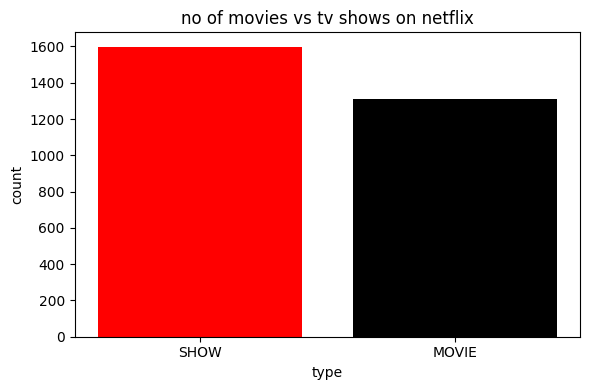

In [30]:
#data visualize : bar chart for no of movies vs tv shows on netfix

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['red','black'])
plt.title('no of movies vs tv shows on netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

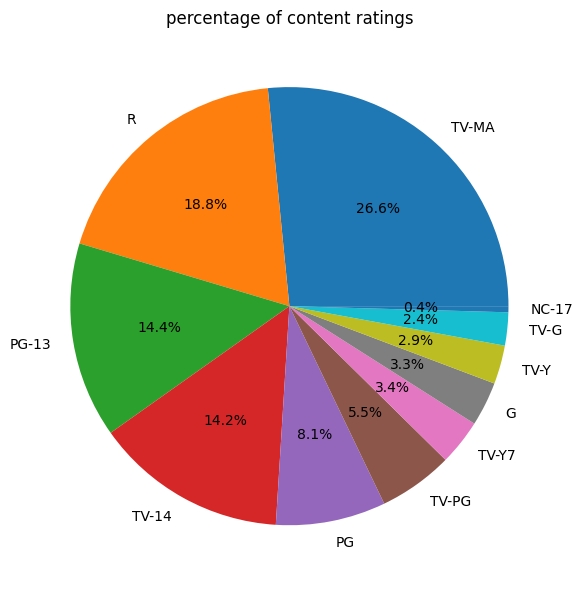

In [34]:
#rating count

age_count = df["age_certification"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(age_count, labels=age_count.index, autopct="%1.1f%%")
plt.title('percentage of content ratings')
plt.tight_layout()
plt.savefig('rating_age_certification_piechart.png',dpi=300,bbox_inches='tight')
plt.show()

In [36]:
# age_sum = df.groupby("age_certification")["imdb_score"].sum()
# plt.pie(age_sum, labels=age_sum.index, autopct="%1.1f%%")


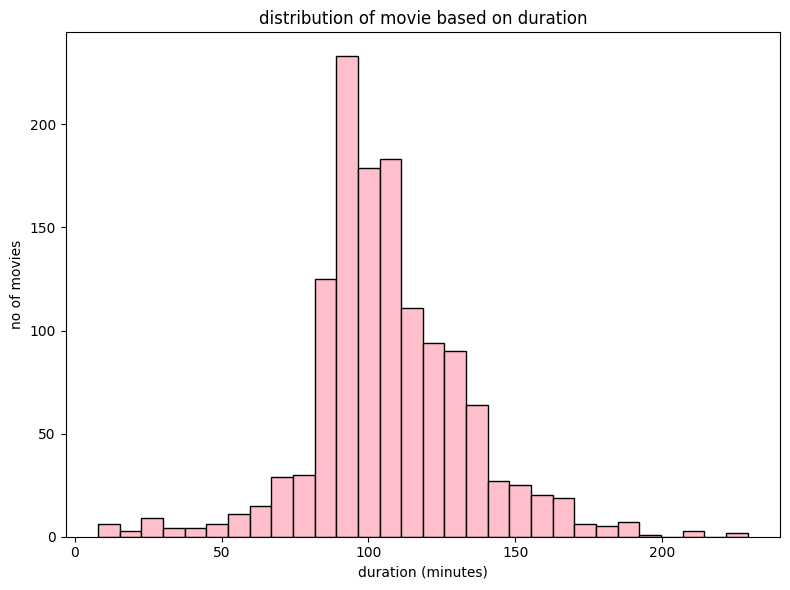

In [38]:
movie_df=df[df['type']=='MOVIE'].copy()
movie_df['runtime_value']=movie_df['runtime'].astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['runtime_value'], bins=30, color='pink', edgecolor='black')
plt.title('distribution of movie based on duration')
plt.xlabel('duration (minutes)')
plt.ylabel('no of movies')
plt.tight_layout()
plt.savefig('movie_distribution_histogram.png')
plt.show()

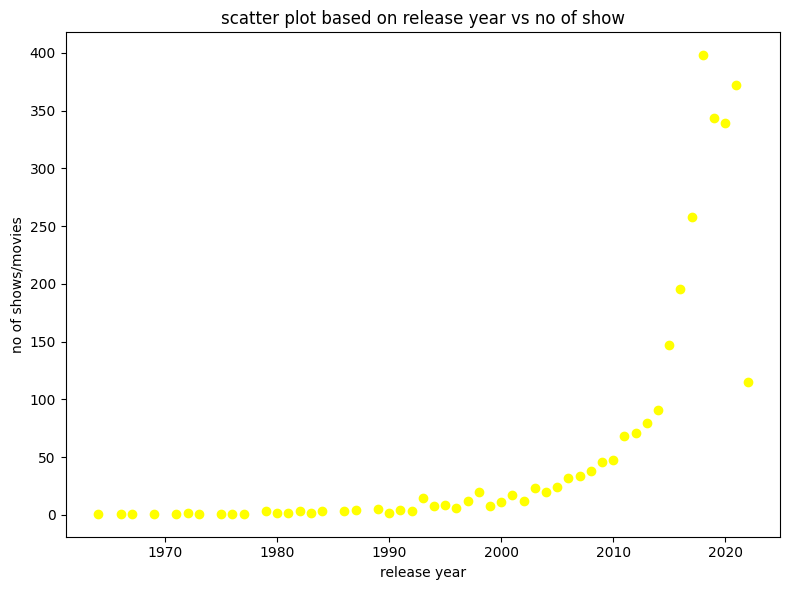

In [39]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_counts.index,release_counts.values,color='yellow')
plt.title('scatter plot based on release year vs no of show')
plt.xlabel('release year')
plt.ylabel('no of shows/movies')
plt.tight_layout()
plt.savefig('movie_release_count_scatterplot.png')
plt.show()


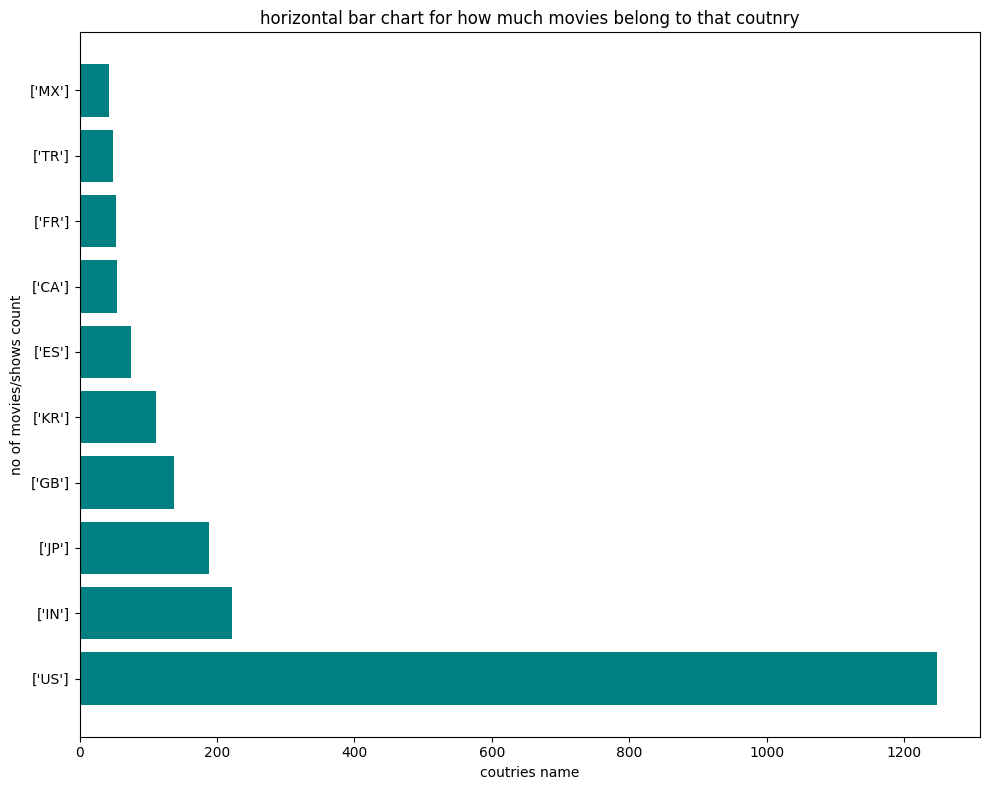

In [41]:
country_counts=df['production_countries'].value_counts().head(10)
plt.figure(figsize=(10,8))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('horizontal bar chart for how much movies belong to that coutnry')
plt.xlabel('coutries name')
plt.ylabel('no of movies/shows count')
plt.tight_layout()
plt.savefig('movie_count_based_on_countries_name.png')
plt.show()

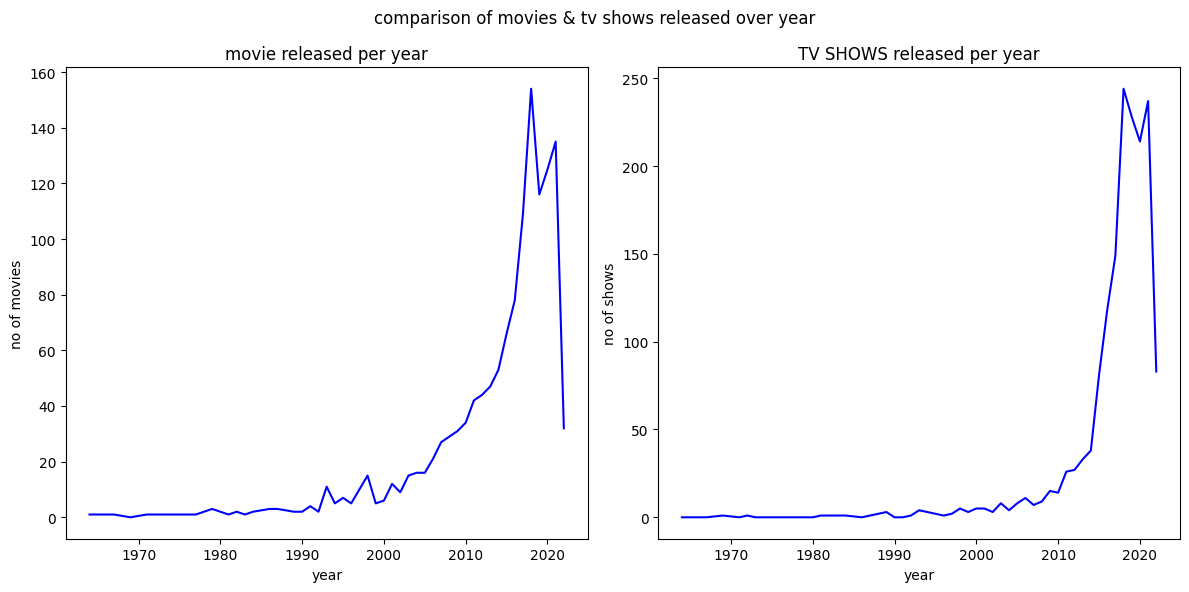

In [45]:
content_year=df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig,ax= plt.subplots(1,2,figsize=(12,6))

ax[0].plot(content_year.index,content_year['MOVIE'], color='blue')
ax[0].set_title('movie released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('no of movies')

ax[1].plot(content_year.index,content_year['SHOW'], color='blue')
ax[1].set_title('TV SHOWS released per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('no of shows')

fig.suptitle('comparison of movies & tv shows released over year')

plt.tight_layout()
plt.savefig('movie_tv_show_per_year.png')

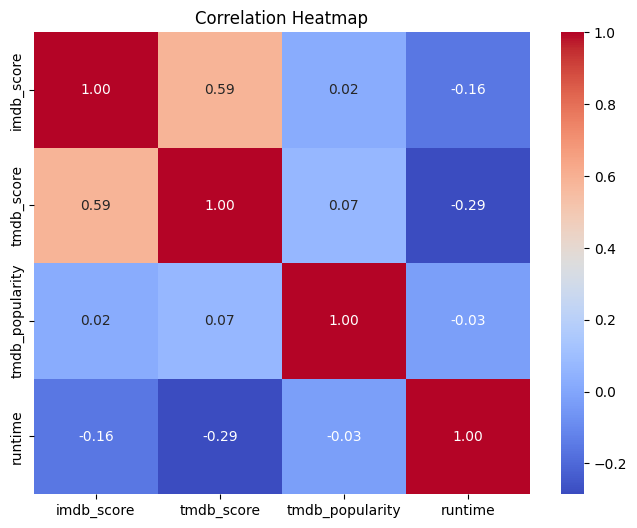

In [49]:
#Correlation Heatmap
numeric_df = df[["imdb_score", "tmdb_score", "tmdb_popularity", "runtime"]]
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('correlation_imdb_score_tmdb_score.png')
plt.show()

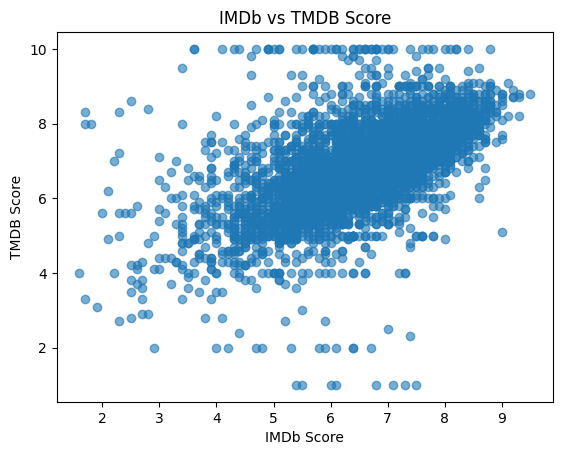

In [53]:
#Scatter Plot (IMDb vs TMDB)
plt.scatter(df["imdb_score"], df["tmdb_score"], alpha=0.6)
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Score")
plt.title("IMDb vs TMDB Score")
plt.savefig('imdb_tmdb_scatterplot.png')
plt.show()


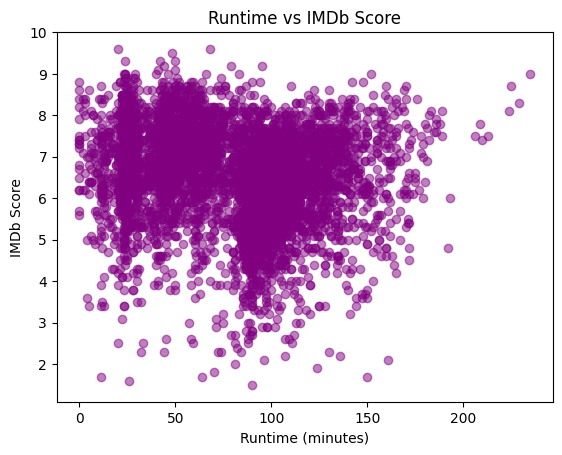

In [60]:
#Scatter Plot (Runtime vs IMDb Score)
plt.scatter(df["runtime"], df["imdb_score"], alpha=0.5, color="purple")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDb Score")
plt.title("Runtime vs IMDb Score")
plt.savefig('runtime_vs_imdb_score.png')
plt.show()


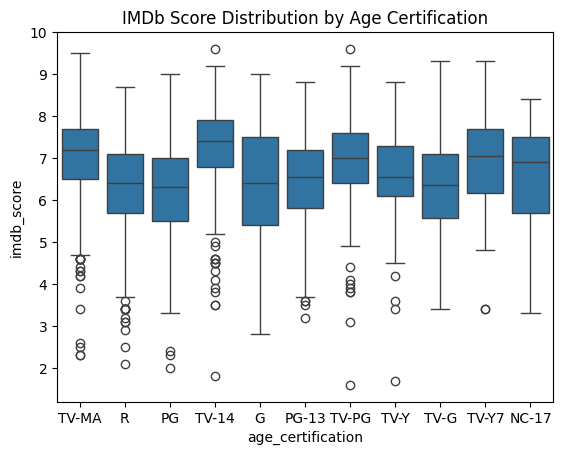

In [59]:
#Boxplot (IMDb Score by Age Certification)
sns.boxplot(x="age_certification", y="imdb_score", data=df)
plt.title("IMDb Score Distribution by Age Certification")
plt.savefig('imdb_score_by_age_certification.png')
plt.show()


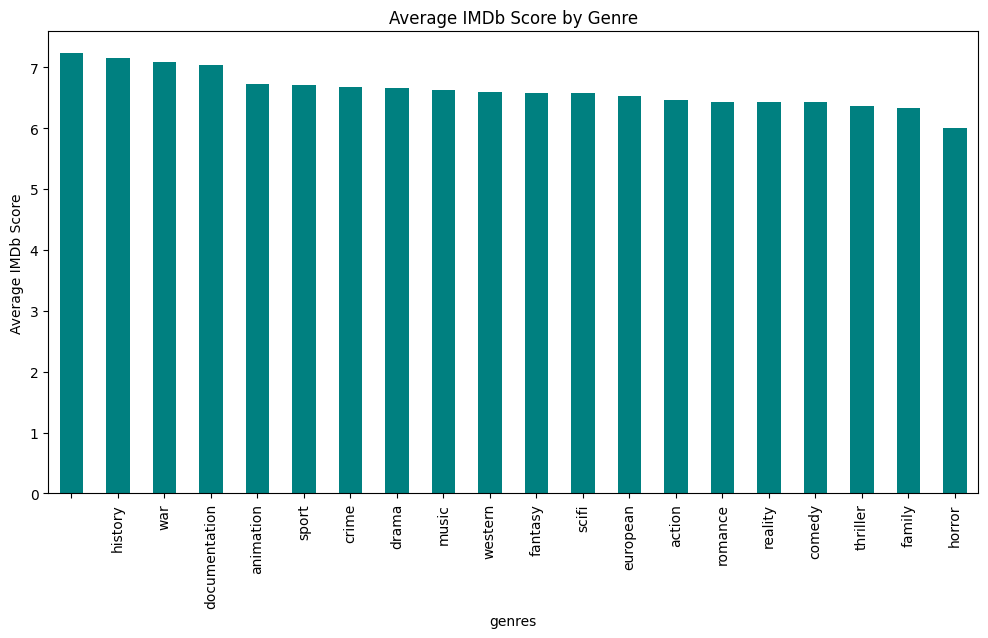

In [61]:
# Bar Plot (Average IMDb Score by Genre)
#if it does not runs use the comment line 
#df["genres"] = df["genres"].str.strip("[]").str.replace("'", "").str.split(", ")
df["genres"] = df["genres"]
df_exploded = df.explode("genres")

genre_avg = df_exploded.groupby("genres")["imdb_score"].mean().sort_values(ascending=False)

genre_avg.plot(kind="bar", figsize=(12,6), color="teal")
plt.ylabel("Average IMDb Score")
plt.title("Average IMDb Score by Genre")
plt.savefig('average_imdb_score_by_genre.png')
plt.show()
